In [14]:
import pandas as pd
import matplotlib.pylab as plt
from tqdm.notebook import tqdm



In [7]:
df = pd.read_csv('save_dataframe.csv')
print(f"Number of unique instruments ({len(df['INSTRUMENT_NAME'].unique())})")
df

Number of unique instruments (1898)


,TIMESTAMP_VALUE,INSTRUMENT_INDEX,INSTRUMENT_STRIKE,INSTRUMENT_MATURITY,INSTRUMENT_TYPE,INSTRUMENT_NAME,ASK_PRICE,ASK_AMOUNT,BID_PRICE,BID_AMOUNT
0,2023-11-30 20:59:39.856,1,800.0,1701378000,InstrumentType.CALL_OPTION,ETH_Call-01Dec2023-800.0,-1.0000,-1.0,-1.0000,-1.0
1,2023-11-30 20:59:39.857,1,800.0,1701378000,InstrumentType.PUT_OPTION,ETH_Put-01Dec2023-800.0,0.0003,186.0,-1.0000,-1.0
2,2023-11-30 20:59:39.855,1,900.0,1701378000,InstrumentType.CALL_OPTION,ETH_Call-01Dec2023-900.0,-1.0000,-1.0,-1.0000,-1.0
3,2023-11-30 20:59:39.857,1,900.0,1701378000,InstrumentType.PUT_OPTION,ETH_Put-01Dec2023-900.0,0.0003,186.0,-1.0000,-1.0
4,2023-11-30 20:59:39.855,1,1000.0,1701378000,InstrumentType.CALL_OPTION,ETH_Call-01Dec2023-1000.0,-1.0000,-1.0,-1.0000,-1.0
...,...,...,...,...,...,...,...,...,...,...
299995,2023-11-30 22:03:25.889,0,38500.0,1701550800,InstrumentType.CALL_OPTION,BTC_Call-03Dec2023-38500.0,0.0055,0.8,0.0050,12.7
299996,2023-11-30 22:03:25.893,0,38000.0,1701982800,InstrumentType.CALL_OPTION,BTC_Call-08Dec2023-38000.0,0.0215,22.4,0.0205,31.8
299997,2023-11-30 22:03:25.883,0,39500.0,1701982800,InstrumentType.CALL_OPTION,BTC_Call-08Dec2023-39500.0,0.0095,28.7,0.0085,104.5
299998,2023-11-30 22:03:25.895,0,43000.0,1701982800,InstrumentType.CALL_OPTION,BTC_Call-08Dec2023-43000.0,0.0019,68.3,0.0014,15.2


In [15]:
shapes = [df[df['INSTRUMENT_NAME'] == name].shape[0] for name in tqdm(df['INSTRUMENT_NAME'].unique())]
df_shapes = pd.concat([pd.Series(df['INSTRUMENT_NAME'].unique()), pd.Series(shapes)], axis=1)
df_shapes.columns = ["INSTRUMENT_NAME", "SHAPE"]
df_shapes

  0%|          | 0/1898 [00:00<?, ?it/s]

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [25]:
df_shapes[df_shapes["SHAPE"] > 1000]

,INSTRUMENT_NAME,SHAPE
43,ETH_Put-01Dec2023-2025.0,1443
44,ETH_Call-01Dec2023-2050.0,1978
45,ETH_Put-01Dec2023-2050.0,1093
46,ETH_Call-01Dec2023-2075.0,1581
84,ETH_future-01Dec2023-none,3252
...,...,...
1541,BTC_future-26Jan2024-none,2898
1708,BTC_future-29Mar2024-none,4240
1799,BTC_future-28Jun2024-none,3478
1896,BTC_future-27Sep2024-none,2141


/var/folders/v8/s588w2f97ms_lm2gst4vv8lm0000gn/T/ipykernel_134/2988765946.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _tmp_df["TIMESTAMP_VALUE"] = pd.to_datetime(_tmp_df["TIMESTAMP_VALUE"])


<Figure size 1200x1200 with 0 Axes>

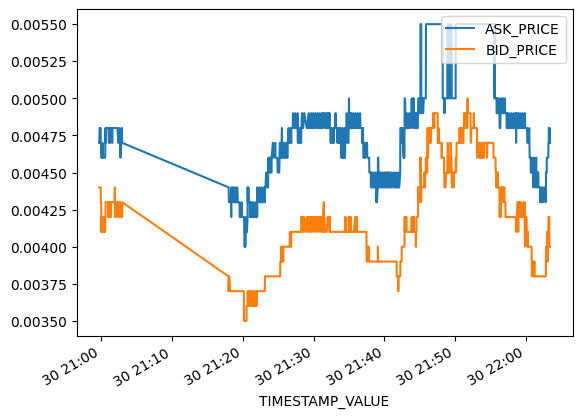

In [30]:
plt.figure(figsize=(12, 12))
_selection_name = "ETH_Call-01Dec2023-2050.0"
_tmp_df = df[df['INSTRUMENT_NAME'] == _selection_name]
_tmp_df["TIMESTAMP_VALUE"] = pd.to_datetime(_tmp_df["TIMESTAMP_VALUE"])
_tmp_df.set_index("TIMESTAMP_VALUE")[["ASK_PRICE", "BID_PRICE"]].plot()
plt.legend(loc="upper right")
plt.show()